# King's County Homes Data Analysis For Kempo Real Estate Agency
![logo](./images/house.webp)

**Author:** Samuel Kabati
***

## Business Problem
Kempo is a real estate agency that helps homeowners buy or sell homes. The real estate agency would like to be able to advise homeowners on how some of their home features are likely to have an impact on the value of their home. The real estate Agency would also like to have a model that could predict house prices.

## Data Understanding
We have data collected on homes that were sold in King's County. From our EDA we know that our predictor or target variable is `price` following a log normal distribution. We have seventeen other variables in the dataset that we could use as our predictors. The predictors will either be of type int or float for modelling later on.


## Data preprocessing


In [874]:
#Loading data
import pandas as pd

data=pd.read_csv("kc_house_data.csv")

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [875]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Separating data into xand y. Our aim is to predict the price, therefore `price` will be on the y axis.

In [876]:


x=data

Selecting columns that are relevant to carry out analysis

In [877]:
irrelevant_columns=[
  'id',
  'lat',
  'long',
  'date'
]
x=x.drop(irrelevant_columns, axis=1)
x.reset_index(inplace=True)
x.drop(['index'],inplace=True,axis=1)
x


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


### Handling missing values

In [878]:
x.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [879]:
x['waterfront'].unique()

array([nan,  0.,  1.])

We have NaNs in `waterfront`, `view` and `yr_renovated`

#### Waterfront

A home could either have a waterfront or not. Looking at the data, a waterfront conatins either a 1 or a 0 The NaN values should therefore be treated as a category of houses without a waterfront. We will replace the NaN values with a 0. We will also change the datatype from a float to an integer as a house cannot conatin 1.1 waterfronts. It can only be an integer value.

In [880]:
x['waterfront']=x['waterfront'].fillna(0.0)
x['waterfront']=x['waterfront'].astype(int)
x['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

#### Year Renovated

In [881]:
x['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Some houses have been renovated while others have not. Those that have been renovated have been assigned a value of 0.0. We will therefore fill the null values with 0.0 and change the data type to an integer.

In [882]:
x['yr_renovated']=x['yr_renovated'].fillna(0)
x['yr_renovated']=x['yr_renovated'].astype(int)


x['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001,
       1980, 1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008,
       1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965,
       1934, 1972, 1944, 1958])

#### View


In [883]:
x['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

The view column represents how good the view was from a scale of 0 to 4. We will fill the `NaN` values of `view` with the median view index for modelling.

In [884]:
#Using median to fill in the missing values
x['view']=x['view'].fillna(x['view'].median())


In [885]:
#Checking to see if there are still missing values 
x.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking for duplicates

In [886]:
x.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

No duplictaes in the training dataset

### Feature engineering

In [887]:
#Creting a column called age_of_house 
x['age_of_house']=2015-x['yr_built']
#Creting a column called time since renovation
x['time_since_renovation']=2015-x['yr_renovated']
x['time_since_renovation']=x['time_since_renovation'].replace(to_replace=2015, value=0)
#Dropping the columns we had before 
x=x.drop(['yr_built','yr_renovated'],axis=1)


### Checking for Multicollinearity of variables

In [888]:
#The correlation matrix
x.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,age_of_house,time_since_renovation
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,-0.053402,0.585241,0.082845,-0.053953,0.064950
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,-0.154092,0.393406,0.030690,-0.155670,-0.007815
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,-0.204786,0.569884,0.088303,-0.507173,0.000836
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,-0.199802,0.756402,0.184342,-0.318152,0.020392
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,-0.129586,0.144763,0.718204,-0.052946,0.012898
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.059541,0.280102,-0.010722,-0.489193,-0.003636
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.028923,0.083823,0.030658,0.024487,0.083314
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.085059,0.278928,0.073083,0.054452,0.080670
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.002888,-0.093072,-0.003126,0.361592,-0.008196
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,-0.185771,0.713867,0.120981,-0.447865,-0.017596


In [889]:
#Pairing the variables 

df=x.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


In [890]:
#Dropping some of the variables with a collinearity above 0.75
x=x.drop(['sqft_above','grade','sqft_living15'],axis=1)

### Log Transformations and Feature Scaling 

In [891]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21597 non-null  float64
 1   bedrooms               21597 non-null  int64  
 2   bathrooms              21597 non-null  float64
 3   sqft_living            21597 non-null  int64  
 4   sqft_lot               21597 non-null  int64  
 5   floors                 21597 non-null  float64
 6   waterfront             21597 non-null  int32  
 7   view                   21597 non-null  float64
 8   condition              21597 non-null  int64  
 9   sqft_basement          21597 non-null  object 
 10  zipcode                21597 non-null  int64  
 11  sqft_lot15             21597 non-null  int64  
 12  age_of_house           21597 non-null  int64  
 13  time_since_renovation  21597 non-null  int32  
dtypes: float64(4), int32(2), int64(7), object(1)
memory us

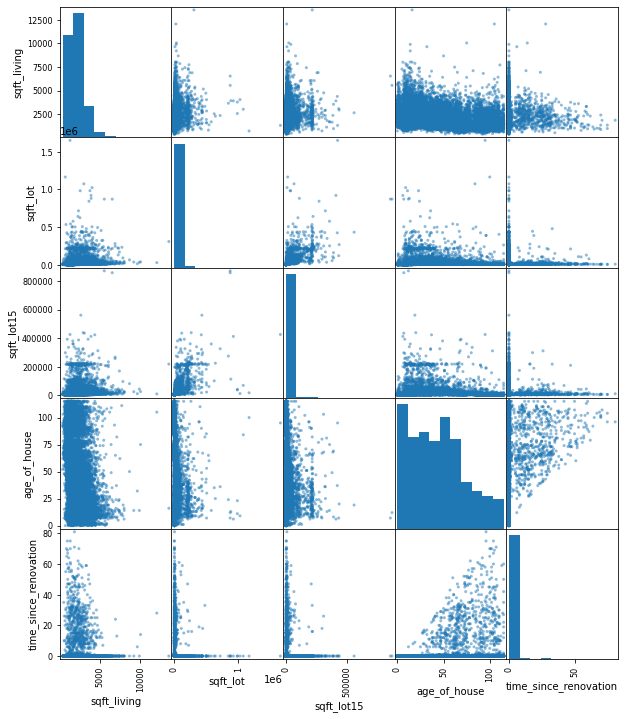

In [892]:
x_columns1=['sqft_living','sqft_lot','sqft_basement','sqft_lot15','age_of_house','time_since_renovation']
pd.plotting.scatter_matrix(x[x_columns1], figsize=(10,12));

Some features are much bigger in magnitude than others. We will use min-max scaling on all the variables to reduce the magnitude on our continous variables.

In [893]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21597 non-null  float64
 1   bedrooms               21597 non-null  int64  
 2   bathrooms              21597 non-null  float64
 3   sqft_living            21597 non-null  int64  
 4   sqft_lot               21597 non-null  int64  
 5   floors                 21597 non-null  float64
 6   waterfront             21597 non-null  int32  
 7   view                   21597 non-null  float64
 8   condition              21597 non-null  int64  
 9   sqft_basement          21597 non-null  object 
 10  zipcode                21597 non-null  int64  
 11  sqft_lot15             21597 non-null  int64  
 12  age_of_house           21597 non-null  int64  
 13  time_since_renovation  21597 non-null  int32  
dtypes: float64(4), int32(2), int64(7), object(1)
memory us

In [894]:
 
import numpy as np
#Min-max Scaling on some of the features

sqft_living = x['sqft_living']
scaled_sqft_living= (sqft_living - min(sqft_living)) / (max(sqft_living) - min(sqft_living))

sqft_lot = x['sqft_lot']
scaled_sqft_lot= (sqft_lot - min(sqft_lot)) / (max(sqft_lot) - min(sqft_lot))

#Dropping a column with a "?" value
x.drop(x[(x['sqft_basement']=="?")].index,inplace=True)
#Converting the column to a numeric data type 
x['sqft_basement']=pd.to_numeric(x['sqft_basement'])
sqft_basement =x['sqft_basement']
scaled_sqft_basement= (sqft_basement  - min(sqft_basement )) / (max(sqft_basement ) - min(sqft_basement ))


sqft_lot15 = x['sqft_lot15']
scaled_sqft_lot15= (sqft_lot15 - min(sqft_lot15)) / (max(sqft_lot15) - min(sqft_lot15))
time_since_ren = x['time_since_renovation']
scaled_time_since_ren= (time_since_ren  - min(time_since_ren )) / (max(time_since_ren ) - min(time_since_ren ))

age_of_house=x['age_of_house']
scaled_age_of_house =  (age_of_house  - min(age_of_house )) / (max(age_of_house ) - min(age_of_house ))

#Adding the scaled dataset
x['sqft_lot']=scaled_sqft_lot
x['sqft_basement']=scaled_sqft_basement
x['sqft_lot15']=scaled_sqft_lot15
x['time_since_renovation']=scaled_time_since_ren
x['age_of_house']=scaled_age_of_house

In [895]:
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,sqft_lot15,age_of_house,time_since_renovation
0,221900.0,3,1.00,1180,0.003108,1.0,0,0.0,3,0.000000,98178,0.005742,0.521739,0.000000
1,538000.0,3,2.25,2570,0.004072,2.0,0,0.0,3,0.082988,98125,0.008027,0.556522,0.296296
2,180000.0,2,1.00,770,0.005743,1.0,0,0.0,3,0.000000,98028,0.008513,0.713043,0.000000
3,604000.0,4,3.00,1960,0.002714,1.0,0,0.0,5,0.188797,98136,0.004996,0.434783,0.000000
4,510000.0,3,2.00,1680,0.004579,1.0,0,0.0,3,0.000000,98074,0.007871,0.243478,0.000000


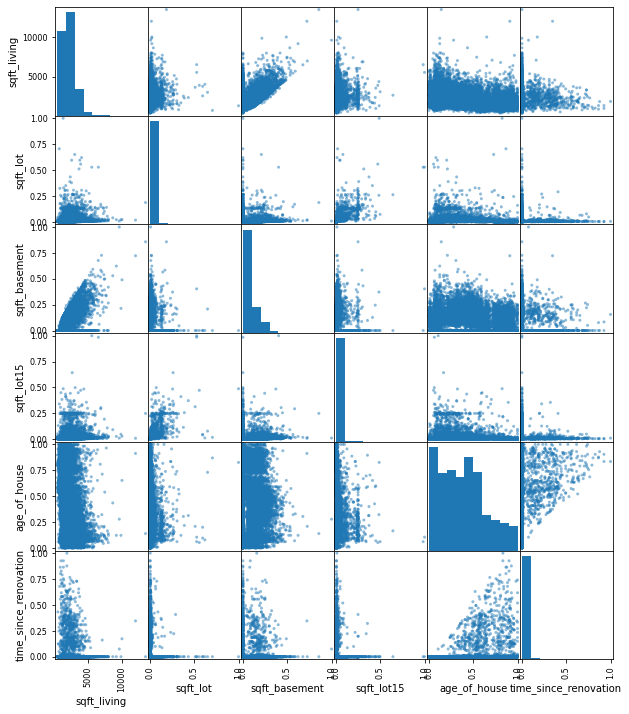

In [896]:

pd.plotting.scatter_matrix(x[x_columns1], figsize=(10,12));

The shape of the bar graphs has not changed but the difference in magnitude can be observed.

### Checking for Categorical variables

In [897]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21143 non-null  float64
 1   bedrooms               21143 non-null  int64  
 2   bathrooms              21143 non-null  float64
 3   sqft_living            21143 non-null  int64  
 4   sqft_lot               21143 non-null  float64
 5   floors                 21143 non-null  float64
 6   waterfront             21143 non-null  int32  
 7   view                   21143 non-null  float64
 8   condition              21143 non-null  int64  
 9   sqft_basement          21143 non-null  float64
 10  zipcode                21143 non-null  int64  
 11  sqft_lot15             21143 non-null  float64
 12  age_of_house           21143 non-null  float64
 13  time_since_renovation  21143 non-null  float64
dtypes: float64(9), int32(1), int64(4)
memory usage: 2.3 MB

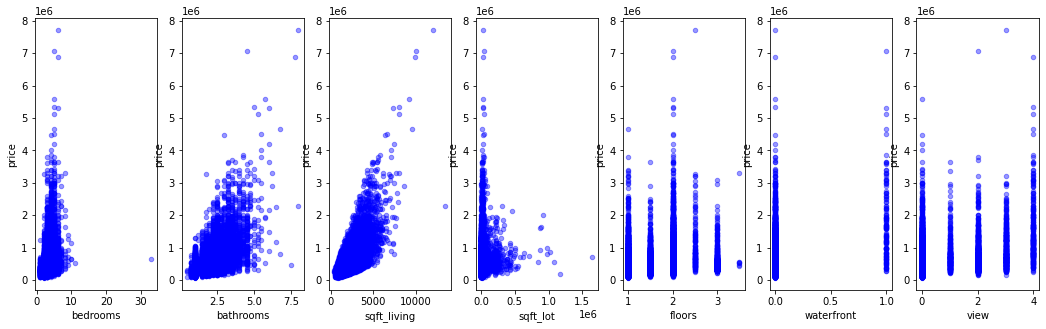

In [898]:
#Creating a scatter plot to identify some categorical variables.

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(18,5))
for xcol, ax in zip([ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','waterfront','view'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

The categorical variables produce vertical lines to show the data is discrete. The most obvious ones are `floors`,`view` and `waterfront`. However, more tests are needes to verify our findings. Checking the number of unique  values in a column as well as the statistics might provide more information.

In [899]:
# Function to check how many unique values are in a column

def check_unique(data,column):
    unique_values=data[column].unique()
    return unique_values
# Function to check the statistics
def print_stats(df,column):
    print('Mean:', df[column].mean())
    print('Median:', df[column].median())
    print('Satandard Deviation:', df[column].std())

In [900]:
#Printing unique values and stats for bedrooms 
unique_values=print(check_unique(x,'bedrooms'))
stats=print_stats(x,'bedrooms')

[ 3  2  4  5  1  6  7  8  9 11 10 33]
Mean: 3.3725582935250435
Median: 3.0
Satandard Deviation: 0.9249165085643833


We could label `bedrooms` as categorical as there are only eleven unique values on the entire column 

In [901]:
#Printing unique values and stats for bathrooms
x['bathrooms']=x['bathrooms'].astype(int)
unique_values=print(check_unique(x,'bathrooms'))
stats=print_stats(x,'bathrooms')

[1 2 3 4 0 5 6 8 7]
Mean: 1.7505084425105235
Median: 2.0
Satandard Deviation: 0.734017807301803


We could also label `bathrooms` as categorical as there are only eight unique values 

In [902]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21143 non-null  float64
 1   bedrooms               21143 non-null  int64  
 2   bathrooms              21143 non-null  int32  
 3   sqft_living            21143 non-null  int64  
 4   sqft_lot               21143 non-null  float64
 5   floors                 21143 non-null  float64
 6   waterfront             21143 non-null  int32  
 7   view                   21143 non-null  float64
 8   condition              21143 non-null  int64  
 9   sqft_basement          21143 non-null  float64
 10  zipcode                21143 non-null  int64  
 11  sqft_lot15             21143 non-null  float64
 12  age_of_house           21143 non-null  float64
 13  time_since_renovation  21143 non-null  float64
dtypes: float64(8), int32(2), int64(4)
memory usage: 2.3 MB

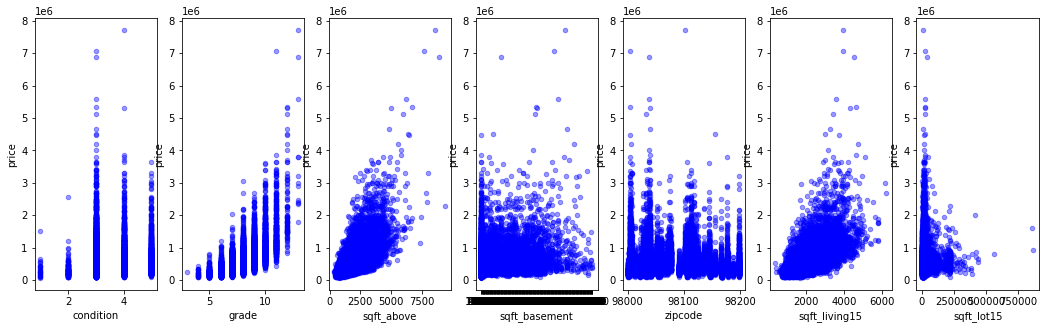

In [903]:
#Using a scatter plot to check for categorical variables 

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(18,5))
for xcol, ax in zip([ 'condition', 'grade', 'sqft_above','sqft_basement','zipcode','sqft_living15','sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

The categorical variables produce vertical lines to show the data is discrete. The most obvious ones are `condition`, `grade` and `zipcode`. However, more tests are needes to verify our findings. Checking the number of unique  values in a column as well as the statistics might provide more information.

All the categorical variables are `floors`, `waterfront`, `view`, `bedrooms`, `bathrooms`, `condition`, `grade` and `zipcode`.

### Dealing with categorical variables

In [904]:
#Changing number of floors to an integer
x['floors']=x['floors'].astype(int)
#Creating the dummy variables 
floors_dummies = pd.get_dummies(x['floors'],prefix='flrs')
water_dummies = pd.get_dummies(x['waterfront'],prefix='waterfrnt')
view_dummies = pd.get_dummies(x['view'],prefix='flrs')
bedrooms_dummies = pd.get_dummies(x['bedrooms'],prefix='bdrms')
bathrooms_dummies = pd.get_dummies(x['bathrooms'],prefix='bthrms')
condition_dummies = pd.get_dummies(x['condition'],prefix='cndtn')
zipcode_dummies = pd.get_dummies(x['zipcode'],prefix='zpcd')

#Dropping the original columns
x= x.drop(['floors','waterfront','view','bedrooms','bathrooms','condition','zipcode'], axis=1)
#Joining the dataframes 
x_dummies= pd.concat([floors_dummies, water_dummies, view_dummies,bedrooms_dummies,bathrooms_dummies,condition_dummies,zipcode_dummies],axis=1 )

x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21143 non-null  float64
 1   sqft_living            21143 non-null  int64  
 2   sqft_lot               21143 non-null  float64
 3   sqft_basement          21143 non-null  float64
 4   sqft_lot15             21143 non-null  float64
 5   age_of_house           21143 non-null  float64
 6   time_since_renovation  21143 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.3 MB


In [905]:
#Joining dummies and x dfs
x=pd.concat([x,x_dummies],axis=1)
x

,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15,age_of_house,time_since_renovation,flrs_1,flrs_2,flrs_3,...,zpcd_98146,zpcd_98148,zpcd_98155,zpcd_98166,zpcd_98168,zpcd_98177,zpcd_98178,zpcd_98188,zpcd_98198,zpcd_98199
0,221900.0,1180,0.003108,0.000000,0.005742,0.521739,0.000000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,2570,0.004072,0.082988,0.008027,0.556522,0.296296,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,770,0.005743,0.000000,0.008513,0.713043,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,0.002714,0.188797,0.004996,0.434783,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1680,0.004579,0.000000,0.007871,0.243478,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,0.000370,0.000000,0.000986,0.052174,0.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,2310,0.003206,0.000000,0.007523,0.008696,0.000000,0,1,0,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,1020,0.000503,0.000000,0.001558,0.052174,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,1600,0.001132,0.000000,0.000731,0.095652,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Preparing the the target Variable

From our EDA we know that price follows a Log Normal Distribution and has a skewness of 4.02. We therefore have to normalize it to reduce skewness and also account for outliers by reducing the magnitudes.

#### Normalizing target variable

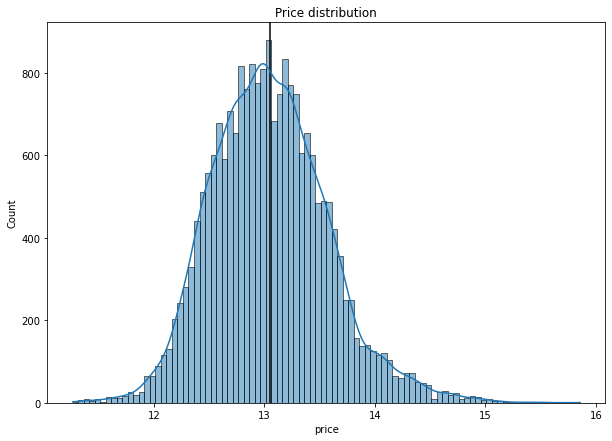

In [906]:
import seaborn as sns

y=x['price']
#Normalizing Y
y=np.log(y)

data=y
mean=data.mean()
fig,ax=plt.subplots(figsize=(10,7))
ax.axvline(mean,color='black')
sns.histplot(data, kde=True)
ax.set_title('Price distribution')
plt.show()

### Splitting the Data

In [907]:
from sklearn.model_selection import train_test_split
x=x.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

## Modelling

In [908]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

### Model validation using Cross Validation

In [909]:
from sklearn.model_selection import cross_validate
cross_val_results=cross_validate(model, x, y ,return_train_score=True)
train_scores=cross_val_results['train_score']
test_scores=cross_val_results['test_score']

print("Trains scores:",train_scores)
print("Test Scores:",test_scores)

Trains scores: [0.86251489 0.86393421 0.86388583 0.86137791 0.86046133]
Test Scores: [0.85911945 0.85279843 0.85264902 0.86375804 0.86531699]


## Evaluation

The test data coefficient of determination isn't much worse than the training data's coefficient meaning the model is not overfitting or underfitting. Infact they seem pretty close. Let's visualise this to get a better look.

### Visualizing  the Coefficient of Determination

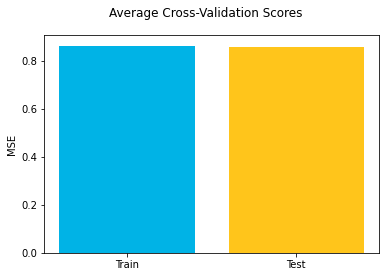

In [910]:
from sklearn.model_selection import cross_validate
cross_val_results1=cross_validate(model, x, y ,return_train_score=True)

train_avg = cross_val_results1["train_score"].mean()
test_avg = cross_val_results1["test_score"].mean()

fig, ax = plt.subplots()
labels=['Train','Test']
colors =["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

### Calculating the coefficient of Determination

In [911]:
model.score(x_test,y_test)

0.8628172456386

The coefficient of determination is at 0.86. The score is significant as 86% of of the variations in the dependent variable y are explained by the independent variables in the model, taking our significance threshold at 75%. The model can therefore be saved and used by the real estate agency for prediction. However, a different approach to data preparation for modelling, could be implemented to see if there is any improvement in the model's perfomance.

# Conclusions and Recommendations


This analysis leads to the following recommendations for the real estate agency:

-The real estate agency should advise homeowners in the King's County area looking to sell houses to ensure that the house can achieve a high grade as houses with a good grade sell for more.

-The real estate agency should advise home owners looking to sell to strive to achieve for an overall condition of about 3 or 4. This is as most houses sold have an overall condition of about 3 and 4 and they tend to be higher priced.

-The real estate agency should advise those looking to sell their homes to achieve a view rating higher than two. Most houses sold have a view rating higher than two and they tend to go for higher prices.

-Most houses sold in the King's County area are averagely priced and the real estate agency should advise people looking to sell to have averagely priced homes.